In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('athletes.csv')

In [3]:
df.head()

,code,name,name_short,name_tv,gender,function,country_code,country,country_full,nationality,nationality_full,nationality_code,height,weight,disciplines,events,birth_date
0,1535420,VALENCIA Alejandra,VALENCIA A,Alejandra VALENCIA,Female,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Women's Individual"", ""Women's Team"", 'Mixed ...",1994-10-17
1,1535429,RUIZ Angela,RUIZ A,Angela RUIZ,Female,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Women's Individual"", ""Women's Team""]",2006-07-28
2,1535430,GRANDE Matias,GRANDE M,Matias GRANDE,Male,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Men's Individual"", ""Men's Team"", 'Mixed Team']",2004-04-26
3,1536460,ROJAS Carlos,ROJAS C,Carlos ROJAS,Male,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Men's Individual"", ""Men's Team""]",2000-01-14
4,1536467,MARTINEZ WING Bruno,MARTINEZ WING B,Bruno MARTINEZ WING,Male,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Men's Individual"", ""Men's Team""]",1998-03-08


In [4]:
df['gender'].value_counts()

gender
Male      5655
Female    5460
Name: count, dtype: int64

In [5]:
df['country_code'].value_counts()

country_code
USA    620
FRA    600
AUS    476
GER    457
JPN    432
      ... 
ASA      2
SOM      1
BIZ      1
NRU      1
LIE      1
Name: count, Length: 206, dtype: int64

In [6]:
df.describe()

,code,height,weight
count,1.111500e+04,11115.000000,11099.000000
mean,1.887426e+06,81.835178,2.213713
std,3.587687e+05,89.504711,13.114771
min,1.532872e+06,0.000000,0.000000
25%,1.888186e+06,0.000000,0.000000
50%,1.918842e+06,0.000000,0.000000
75%,1.948950e+06,177.000000,0.000000
max,9.460001e+06,222.000000,113.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11115 entries, 0 to 11114
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   code              11115 non-null  int64  
 1   name              11115 non-null  object 
 2   name_short        11115 non-null  object 
 3   name_tv           11115 non-null  object 
 4   gender            11115 non-null  object 
 5   function          11115 non-null  object 
 6   country_code      11115 non-null  object 
 7   country           11115 non-null  object 
 8   country_full      11115 non-null  object 
 9   nationality       11115 non-null  object 
 10  nationality_full  11115 non-null  object 
 11  nationality_code  11115 non-null  object 
 12  height            11115 non-null  int64  
 13  weight            11099 non-null  float64
 14  disciplines       11115 non-null  object 
 15  events            11115 non-null  object 
 16  birth_date        11115 non-null  object

In [8]:
from datetime import date, datetime
def calculate_age(dob):
    today = date.today()
    dob_date = datetime.strptime(dob,'%Y-%m-%d')
    return today.year - dob_date.year - ((today.month,today.day) < (dob_date.month,dob_date.day))

In [9]:
df['age'] = df['birth_date'].apply(calculate_age)

In [10]:
df['gender'] = df['gender'].replace({'Male':0,'Female':1})

/tmp/ipykernel_63457/35551863.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Male':0,'Female':1})


In [11]:
height_weight_gt_0 = (df['height'] > 0) & (df['weight'] > 0)

In [12]:
df_clean = df[height_weight_gt_0]

In [13]:
corr_matrix = df_clean.corr(numeric_only=True)


In [14]:
corr_matrix['weight'].sort_values(ascending=False)

weight    1.000000
height    0.850432
code      0.101765
age       0.037125
gender   -0.804444
Name: weight, dtype: float64

In [15]:
df_regression = df_clean[['weight','height','gender']]

<Axes: xlabel='height', ylabel='weight'>

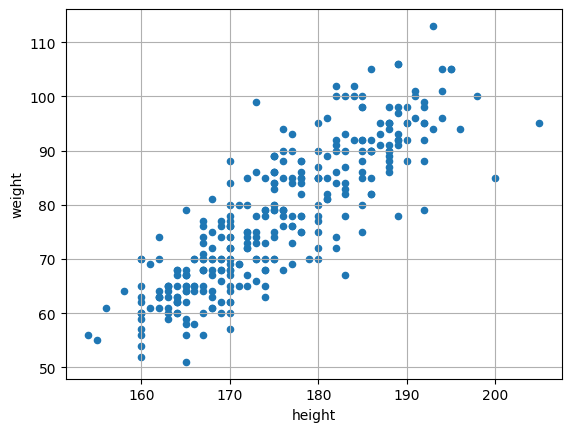

In [16]:
df_regression.plot(kind="scatter", x="height", y="weight", grid=True)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler



In [18]:
X = df_regression.drop(columns=['weight'])
y = df_regression['weight']

In [19]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Step 4: Predict using the scaled test data
predictions = model.predict(X_test_scaled)

r2 = r2_score(y_test, predictions)
r2

0.8080421161531376

In [20]:
mape = mean_absolute_percentage_error(y_test, predictions)
mape

0.05632717350772522

In [21]:
from joblib import dump,load

# Save the trained model
dump(model, 'linear_model.joblib')

# Save the scaler
dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [22]:
# Load the scaler and model
scaler = load('scaler.joblib')
model = load('linear_model.joblib')

# Example: Predict for new data
new_data = [[190, 0]]  
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)
prediction

/home/anibal/miniconda3/envs/python-jupyter/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([93.8628387])